In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns #higher level package for representations

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score
from sklearn.decomposition import PCA

from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [7]:
df_full = pd.read_csv("/Users/harshvardhankanthode/Code/DDS/ML/ML Project/bank+marketing/bank 2/bank-full.csv", delimiter=";")
df = pd.read_csv("/Users/harshvardhankanthode/Code/DDS/ML/ML Project/bank+marketing/bank 2/bank.csv", delimiter=";")

In [11]:
df.head()                           

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
df_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [19]:
df_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Since the smaller sample of the full dataset is representative of the larger dataset, we can proceed with the analysis with just the sample

In [22]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [29]:
df.rename(columns={ 'y': "Label" }, inplace= True)

In [62]:
df.job.value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [72]:
df.marital.value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [78]:
df.Label.value_counts()

Label
no     4000
yes     521
Name: count, dtype: int64

## Handling the categorical variables

We can see above that the 17 columns are split between "Object" and "int64" types.
Considering the "y" column as the Target Label, we have to handle the other "Object" type columns namely:
1. `Job` : The type of job the person is doing
2. `Marital` : Marital Status { Married, Divorced, Single}
3. `Education`: Education level { Primary, Secondary, Tertiary, Unknwon}
4. `Default` : Whether the person has defaulted or not { yes, no}
5. `Housing`: Whether the person has a housing loan or not { yes, no}
6. `Loan` : Whether the person has a personal loan or not { yes, no}
7. `Contact` : Communication Type { Telephone, Cellular, Unknown}
8. `Month` : Last Month contacted {jan - dec}
9. `poutcome` Outcome of previous campaign { unknown, other, failure, success }

We can take a better look at these columns


In [48]:
# We're storing the categorial features in a list to plot the distribution of the values together
categorical = [feature[0] for feature in df.dtypes.items() if ( feature[1] == "object" and feature[0] != 'Label')] 
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [80]:
# We're storing the numerical in a list to plot the distribution of the values together
numerical = [feature[0] for feature in df.dtypes.items() if ( feature[1] == "int64" and feature[0] != 'Label')] 
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [69]:
#Rename values in the categorical columns for better view in the plot
df_plot = df.copy()
df_plot.job = df.job.replace({ "management": "m", 
                        "blue-collar" : "b",
                        "technician" : "t",   
                        "admin." : "a",
                        "services" : "s",
                        "retired" : "r",         
                        "self-employed" : "se",
                        "entrepreneur" : "e",    
                        "unemployed" : "u",       
                        "housemaid" : "h"   ,   
                        "student" : "s", 
                        "unknown" : "unk"   })

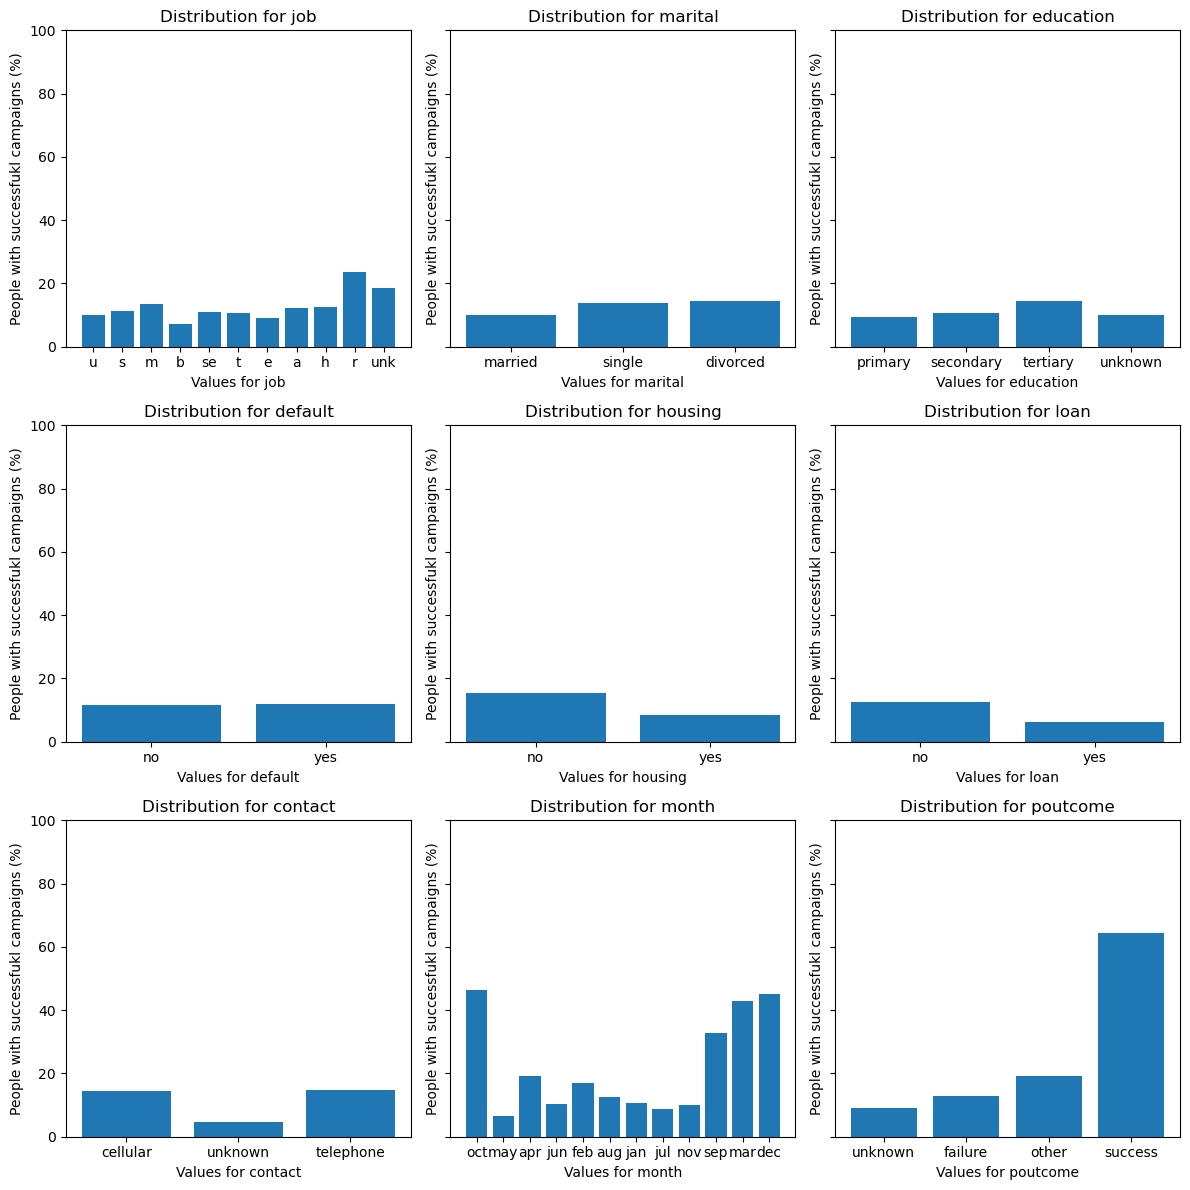

In [79]:
# We will now plot all the 9 categorical variables side by side. X axis would be the categories and Y would be the number of people with a successful campaign
fig, axes = plt.subplots(3, 3, sharey=True, figsize=(12,12))
for i, cat in enumerate(categorical):
    ax = axes.flat[i]
    cat_values = [ cat_value for cat_value in df_plot[cat].unique() ] # No NaN values to handle here

    campaign_success = [ len(df_plot[(df_plot[cat] == val) & (df_plot.Label == "yes") ]) / len( df_plot[df_plot[cat] == val]) for val in cat_values]
    # campaign_success = [ len(df_plot[(df_plot[cat] == val) & (df_plot.Label == "yes") ]) / len( df_plot) for val in cat_values]
    #With percentages
    campaign_success = [ x * 100 for x in campaign_success]

    ax.bar([str(x) for x in cat_values], campaign_success)
    ax.set_ylim(0, 100)
    ax.set_xlabel(f"Values for {cat}")
    ax.set_ylabel('People with successfukl campaigns (%)')
    ax.set_title(f"Distribution for {cat}")

fig.tight_layout()

### Correlation Plot
We can see by the correlation plot that the features are not that strongly correlated, except for the `pdays` and `previous` columns. Hence we can keep all of them

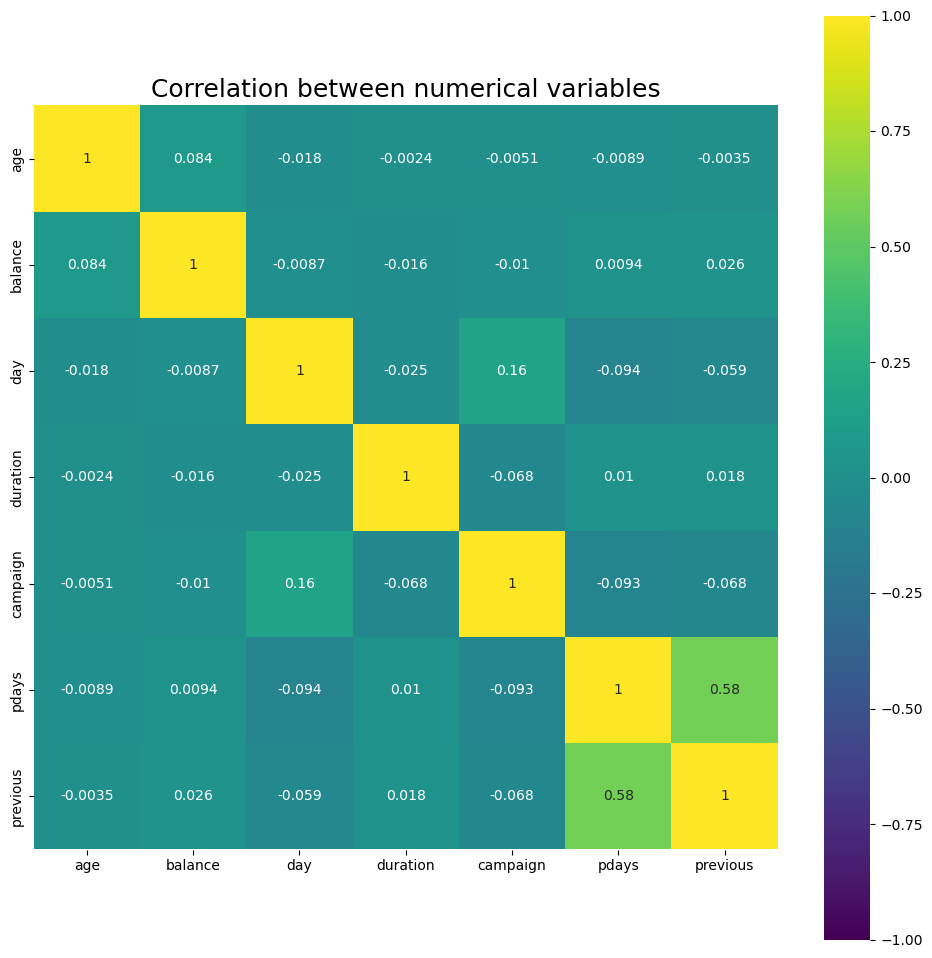

In [90]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df[numerical].corr(), square=True, annot=True, cmap=plt.cm.viridis, vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation between numerical variables', fontsize=18);

/Users/harshvardhankanthode/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


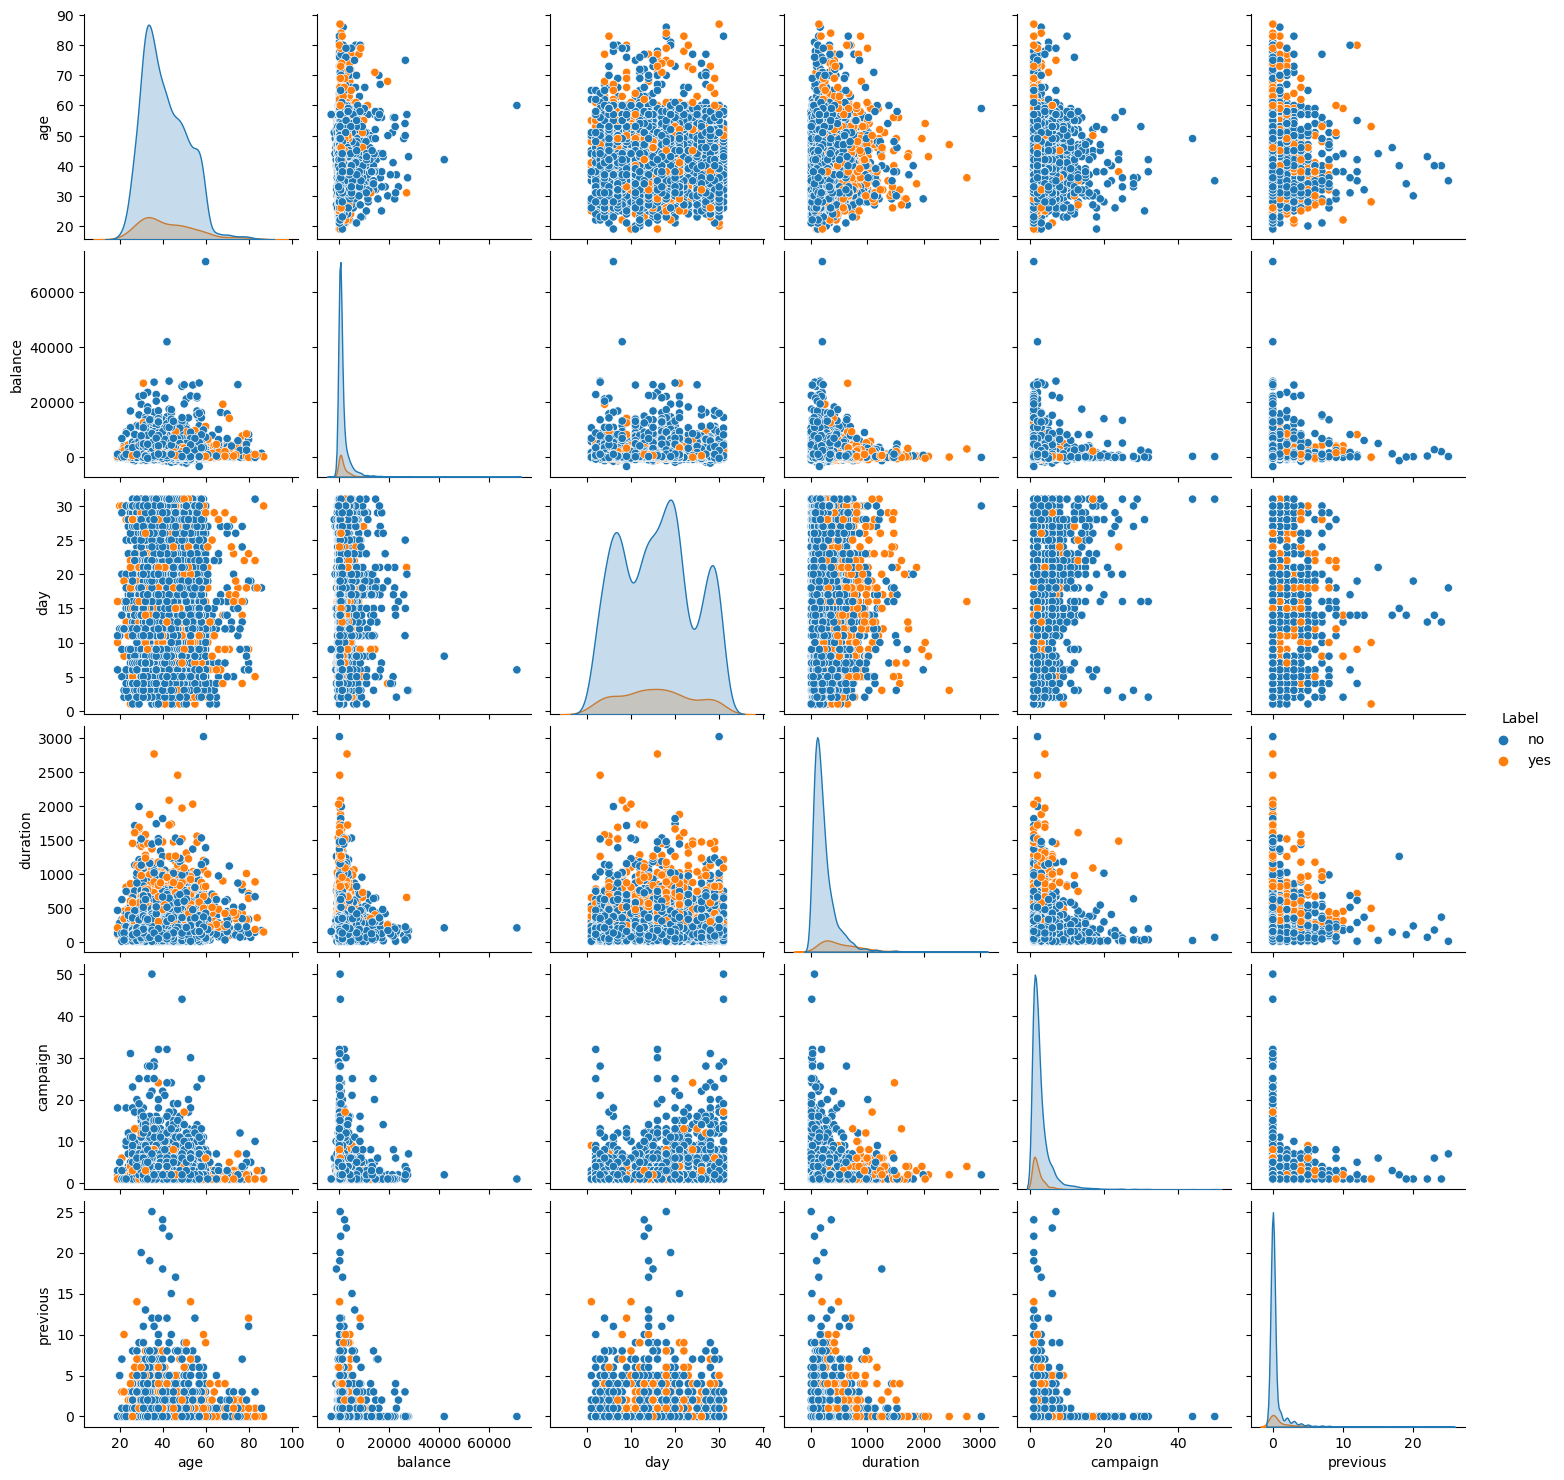

In [187]:
pair_cols = numerical + ["Label"]
sns.pairplot(df[pair_cols], hue= "Label")

Looking at the boxplots of the numerical variables mapped against the labels would give us an idea of where the data is centered for the Yes and No classes.

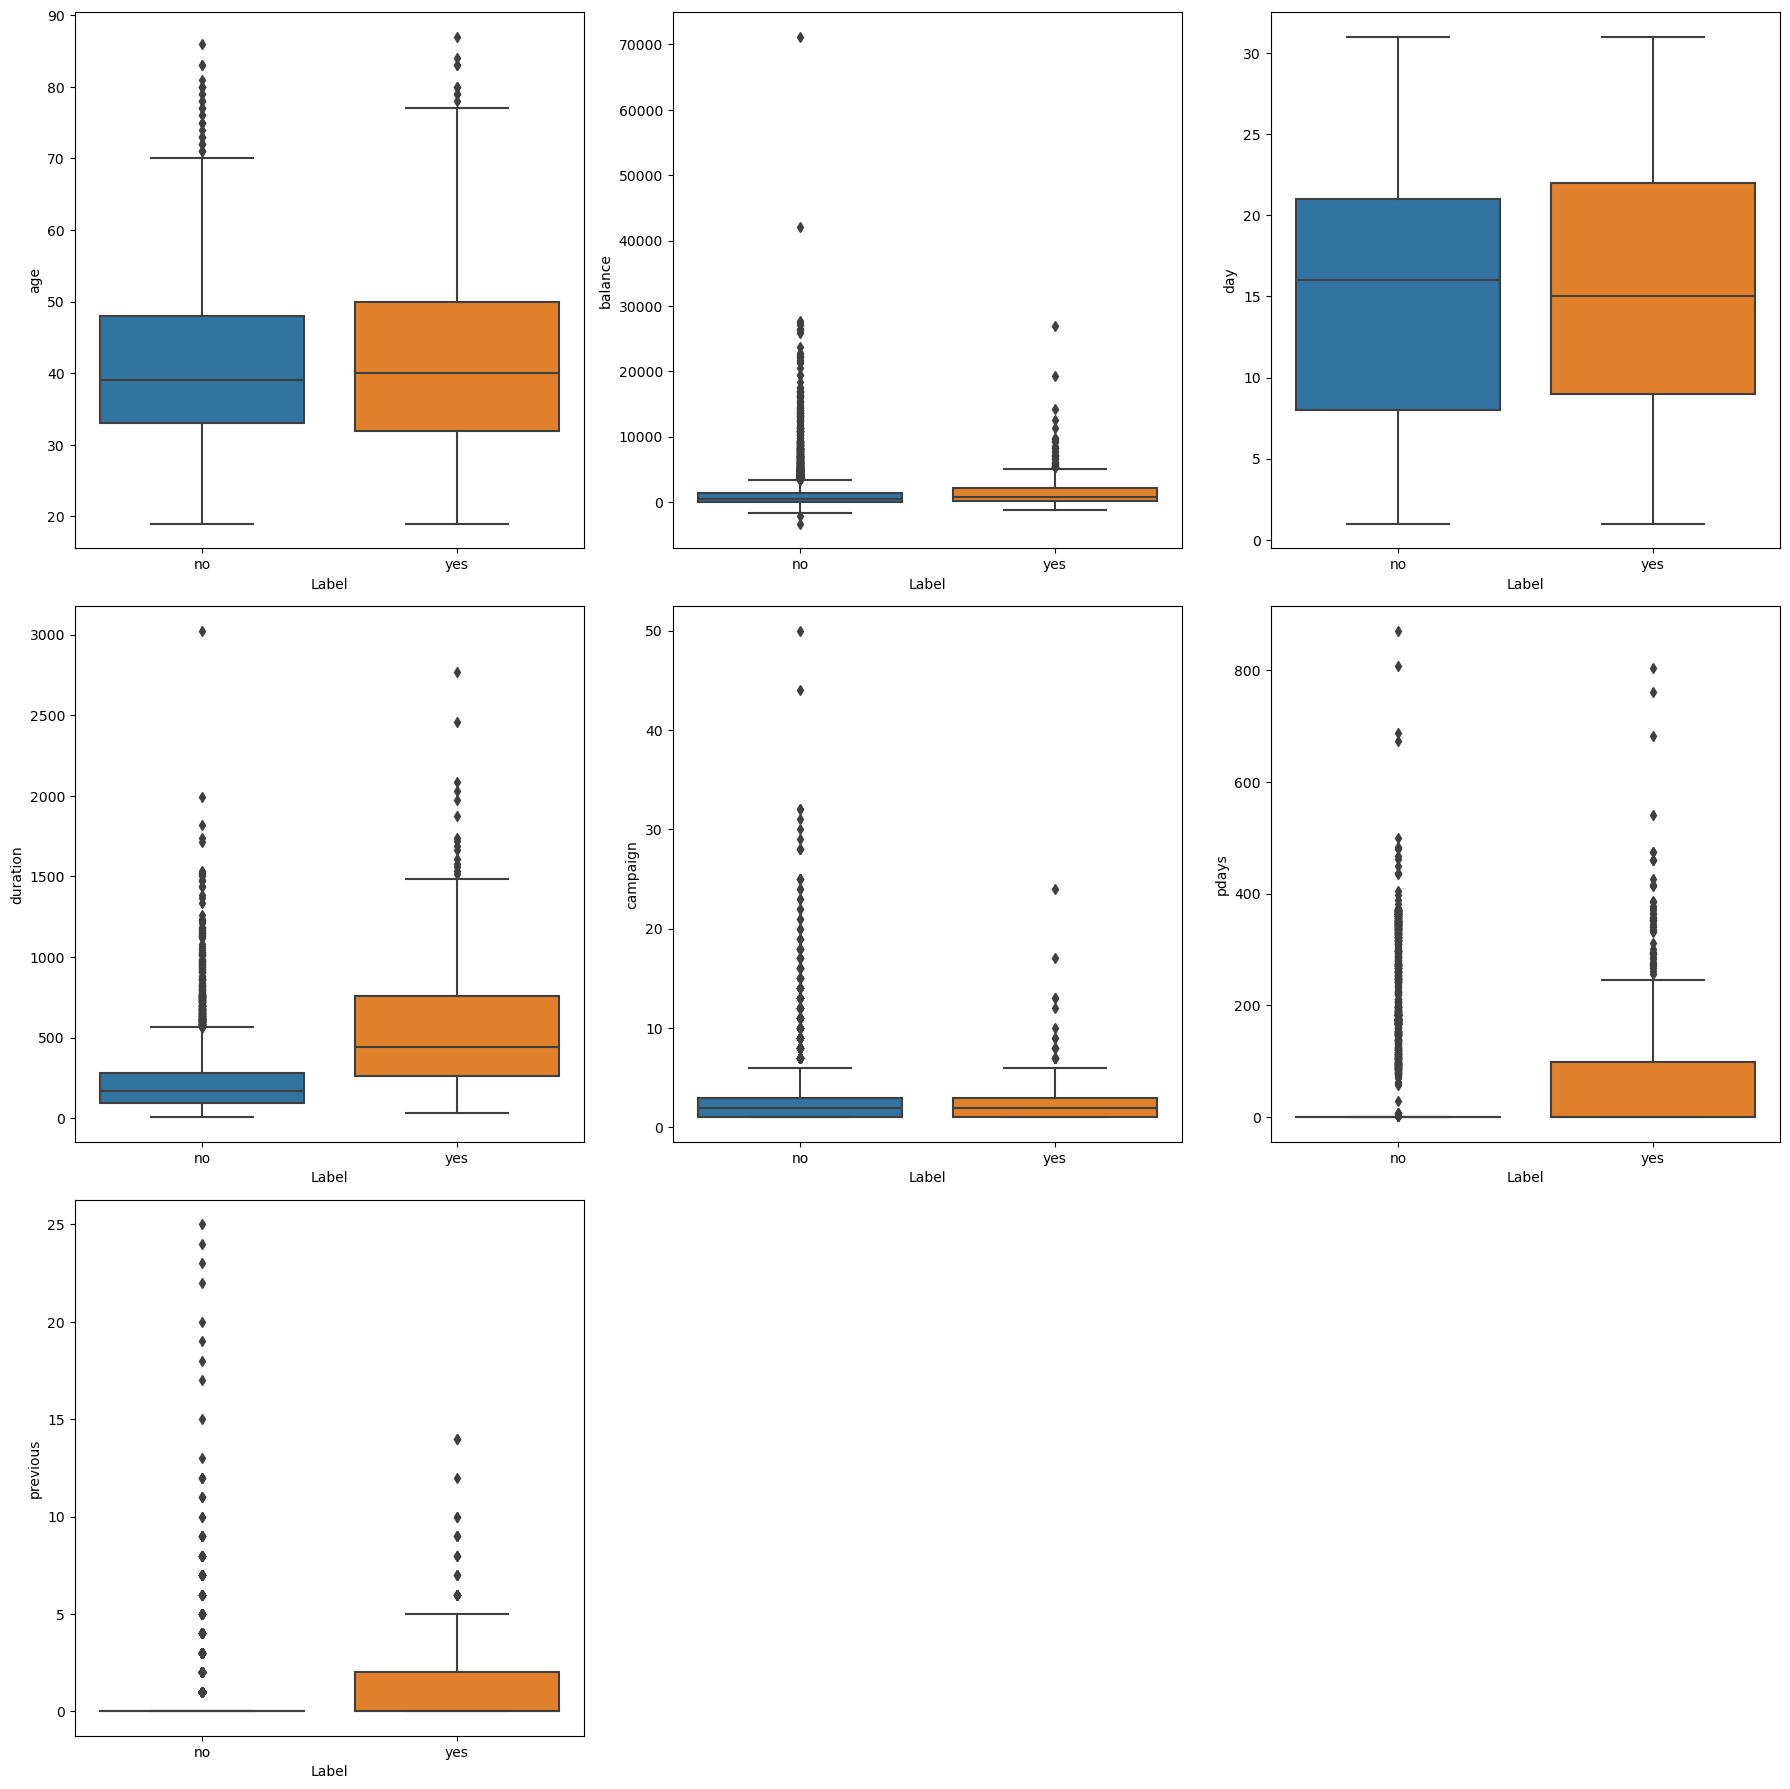

In [97]:
#example of how to accomodate the 1.5 for the whiskers...
fig, axes = plt.subplots(3, 3, figsize=(18,18))
sns.boxplot(data=df, x='Label', y='age', whis=1.5, ax=axes[0][0]);
sns.boxplot(data=df, x='Label', y='balance', whis=1.5, ax=axes[0][1]);
sns.boxplot(data=df, x='Label', y='day', whis=1.5, ax=axes[0][2]);
sns.boxplot(data=df, x='Label', y='duration', whis=1.5, ax=axes[1][0]);
sns.boxplot(data=df, x='Label', y='campaign', whis=1.5, ax=axes[1][1]);
sns.boxplot(data=df, x='Label', y='pdays', whis=1.5, ax=axes[1][2]);
sns.boxplot(data=df, x='Label', y='previous', whis=1.5, ax=axes[2][0]);

fig.delaxes(axes.flat[-1])
fig.delaxes(axes.flat[-2])
fig.tight_layout();

In [115]:
df.pdays.value_counts()

pdays
-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: count, Length: 292, dtype: int64

In [114]:
print(len(df.loc[df["Label"] == "no"]["pdays"]))
print(len(df.loc[df["Label"] == "yes"]["pdays"]))
print(np.median(df.loc[df["Label"] == "no"]["pdays"]))
print(np.median(df.loc[df["Label"] == "yes"]["pdays"]))

4000
521
-1.0
-1.0


Here we can drop the pdays column, since the -1 value is counter-intuitive to the feature. As the lower the number goes, the lesser the time of the last contact is.

In [118]:
df.drop(columns= ["pdays"], inplace= True)

In [123]:
numerical.remove("pdays")

### One-hot encoding the Categorical Variables
Since SVMs cannot handle multi-class Categorical variables, we need to 1-hot encode them.

In [125]:
X = df[numerical + categorical]
y = df["Label"]

In [126]:
X_encoded = pd.get_dummies(X, columns= categorical)
X_encoded.head()

<bound method NDFrame.head of       age  balance  day  duration  campaign  previous  job_admin.  \
0      30     1787   19        79         1         0       False   
1      33     4789   11       220         1         4       False   
2      35     1350   16       185         1         1       False   
3      30     1476    3       199         4         0       False   
4      59        0    5       226         1         0       False   
...   ...      ...  ...       ...       ...       ...         ...   
4516   33     -333   30       329         5         0       False   
4517   57    -3313    9       153         1         0       False   
4518   57      295   19       151        11         0       False   
4519   28     1137    6       129         4         3       False   
4520   44     1136    3       345         2         7       False   

      job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
0               False             False          False  ...      Fa

In [ ]:
categorical_dummies = [ item for item in list(X_encoded.columns) if item not in numerical]
categorical_dummies

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state= 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_scaled = scale(X_encoded)

In [136]:
clf_svm = SVC(random_state=42, kernel='rbf')
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

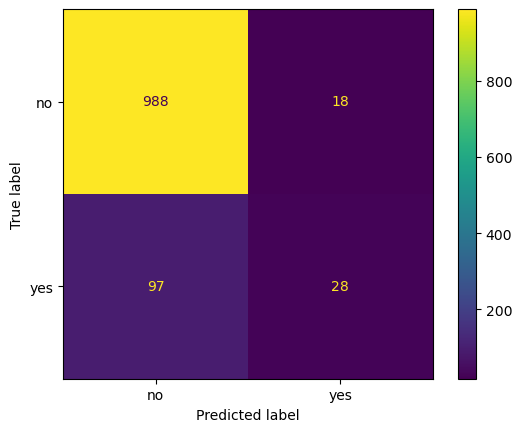

In [137]:
predictions = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test,predictions, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= clf_svm.classes_)
disp.plot()
plt.show()

In [183]:
print(( f"Accuracy score: {accuracy_score(y_test, predictions) }"))
print( f"Precision Score: {precision_score(y_test, predictions, pos_label= 'yes') }")
print( f"Recall Score: {recall_score(y_test, predictions, pos_label= 'yes') }")
print( f"F1 Score: {f1_score(y_test, predictions, pos_label= 'yes') }")


Accuracy score: 0.8983200707338639
Precision Score: 0.6086956521739131
Recall Score: 0.224
F1 Score: 0.3274853801169591


In [163]:
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']
cv_scores = cross_validate(clf_svm, X_scaled, y, cv = 100, scoring= scoring)
cv_scores

/Users/harshvardhankanthode/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshvardhankanthode/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshvardhankanthode/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshvardhankan

{'fit_time': array([0.18418193, 0.17349505, 0.17502809, 0.17575192, 0.17541409,
        0.17746615, 0.17553067, 0.17371535, 0.1707201 , 0.17332602,
        0.17519093, 0.17270017, 0.17301226, 0.17040825, 0.16846085,
        0.17793274, 0.17629218, 0.16939688, 0.1762569 , 0.1720612 ,
        0.17177892, 0.17228317, 0.17194891, 0.17266083, 0.17586303,
        0.1741991 , 0.17312098, 0.1719768 , 0.17498302, 0.17238188,
        0.17008281, 0.17546391, 0.17112899, 0.1746769 , 0.17276096,
        0.17194319, 0.17067623, 0.17438197, 0.17389393, 0.17222095,
        0.17356396, 0.1721108 , 0.17516279, 0.17243195, 0.17291594,
        0.17068005, 0.17258787, 0.17207408, 0.18127298, 0.175488  ,
        0.17359686, 0.17156029, 0.17456794, 0.1724    , 0.1732049 ,
        0.17424607, 0.17445183, 0.1719842 , 0.17139196, 0.23605585,
        0.18010712, 0.17440295, 0.17325377, 0.17098498, 0.17685008,
        0.17256689, 0.17379522, 0.18539023, 0.17893815, 0.17650318,
        0.18142986, 0.17457199, 0.17

In [164]:
print("Accuracy Metric: %0.2f score with a standard deviation of %0.2f" % (cv_scores["test_accuracy"].mean(), cv_scores["test_accuracy"].std()))
print("Precision Metric: %0.2f score with a standard deviation of %0.2f" % (cv_scores["test_precision_macro"].mean(), cv_scores["test_precision_macro"].std()))
print("Recall Metric: %0.2f score with a standard deviation of %0.2f" % (cv_scores["test_recall_macro"].mean(), cv_scores["test_recall_macro"].std()))
print("F1 Metric: %0.2f score with a standard deviation of %0.2f" % (cv_scores["test_f1_macro"].mean(), cv_scores["test_f1_macro"].std()))

Accuracy Metric: 0.89 accuracy with a standard deviation of 0.02
Precision Metric: 0.74 accuracy with a standard deviation of 0.21
Recall Metric: 0.59 accuracy with a standard deviation of 0.08
F1 Metric: 0.61 accuracy with a standard deviation of 0.11


In [165]:
y_pred_cv = cross_val_predict(clf_svm, X_scaled, y, cv=100)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

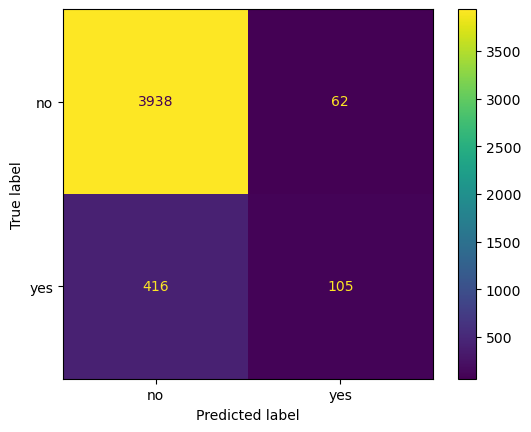

In [171]:
cm = confusion_matrix(y,y_pred_cv, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= clf_svm.classes_)
disp.plot()
plt.show()

In [184]:
print(( f"Accuracy score: {accuracy_score(y, y_pred_cv) }"))
print( f"Precision Score: {precision_score(y, y_pred_cv, pos_label= 'yes')}")
print( f"Recall Score: {recall_score(y, y_pred_cv, pos_label= 'yes') }")
print( f"F1 Score: {f1_score(y, y_pred_cv, pos_label= 'yes') }")

Accuracy score: 0.8942711789427118
Precision Score: 0.6287425149700598
Recall Score: 0.20153550863723607
F1 Score: 0.3052325581395348


### Ways to Improve the model:
Now that we have seen if the model is used, passing most of the features, it doesn't perform well when predicting the minority class.
We can try the following methods to improve the performance:
1. Handling Class imbalance
2. Feature Selection

We can try forward stepwise Feature Selection to reduce the number of features

In [197]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

clf_svm1 = SVC(random_state=42, kernel='rbf')

In [203]:
# class Solution:
#     features = list()
#     mse = float('Inf')
    
#     def __init__(self, y):
#         pred = ["no"] * len(y)
#         self.f1_score = f1_score(y, pred,pos_label= 'yes')
#         # self.mse = np.square(np.subtract(y,[y.mean()]*len(y))).mean() 

#     def update(self, features, f1_score):
#         if f1_score > self.f1_score:
#             self.features = features
#             self.f1_score = f1_score
#             return True
#         return False

# all_features = numerical + categorical_dummies
# current_features = list() #start with empty model
# best = Solution(y) #initialize solution

# while current_features != all_features: #I don't want to get the model with all features, I'm trying to reducing them!
#     selected_feature = None
#     print('Feature List to select from', (set(all_features) - set(current_features)))
#     for feature in set(all_features) - set(current_features):
#         new_features = current_features + [feature] #add one feature at a time
#         f1_scores = cross_val_score(
#             estimator=clf_svm1,
#             X=X_train_scaled[new_features], y=y_train,
#             cv=kfold, scoring='f1')
#         f1_score = np.average(f1_score)
        
#         if best.update(new_features, f1_score):
#             selected_feature = feature
            
#     if selected_feature:
#         current_features.append(selected_feature)
#         print("         New and Improved feature Set", current_features, "\n         With MSE:", best.mse)

#     else:
#         break

Feature List to select from {'loan_yes', 'month_sep', 'job_student', 'job_retired', 'job_housemaid', 'loan_no', 'previous', 'education_tertiary', 'contact_unknown', 'month_dec', 'contact_cellular', 'housing_no', 'job_unknown', 'month_nov', 'campaign', 'age', 'job_technician', 'month_mar', 'job_blue-collar', 'job_services', 'poutcome_unknown', 'poutcome_failure', 'day', 'job_management', 'marital_single', 'education_unknown', 'housing_yes', 'poutcome_other', 'job_self-employed', 'month_apr', 'education_primary', 'job_entrepreneur', 'marital_married', 'month_may', 'education_secondary', 'poutcome_success', 'month_oct', 'job_admin.', 'month_jun', 'default_no', 'contact_telephone', 'month_aug', 'month_jul', 'month_feb', 'job_unemployed', 'balance', 'marital_divorced', 'duration', 'default_yes', 'month_jan'}


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices